# 1. Load Data

In [2]:
import pandas as pd
from google.colab import files

In [3]:
uploaded = files.upload()

NameError: name 'files' is not defined

In [7]:
import pandas as pd

#Loading data into data frame and displaying the data.
df = pd.read_csv('data/train.csv')
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


<hr> </hr>
<h1> 2. Data Preproccessing </h1>

In [8]:
#Import necessary Libraries for Data Prepocessing
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Drop irrelevant columns
columns_to_drop = ['PassengerId', 'Name']
df.drop(columns_to_drop, axis=1, inplace=True)

# Split the 'Cabin' column into 'Deck', 'CabinNumber', and 'Side'
df['Deck'] = df['Cabin'].str.extract(r'([A-Za-z])')  # Extract the first letter (Deck)
df['CabinNumber'] = df['Cabin'].str.extract(r'(\d+)')  # Extract the digits (Cabin number)
df['Side'] = df['Cabin'].str.extract(r'([PS])')  # Extract the side ('P' for Port, 'S' for Starboard)

# Drop the original 'Cabin' column after the split
df.drop('Cabin', axis=1, inplace=True)

# Combine all the spending features into a single total spend feature
spend_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df[spend_cols] = df[spend_cols].fillna(0)  # Fill missing spending data with 0
df['TotalSpend'] = df[spend_cols].sum(axis=1)  # Create TotalSpend as the sum of all spending features

# Fill missing values for each of the extracted features
df['Deck'] = df['Deck'].fillna('None')
df['CabinNumber'] = df['CabinNumber'].fillna('None')
df['Side'] = df['Side'].fillna('None')

# Fill missing boolean values (CryoSleep) with false if spenditure was 0
df['CryoSleep'] = df['CryoSleep'].fillna(df['TotalSpend'] == 0).astype(bool)

# Filter the DataFrame to get the rows where VIP is True
vip_df = df[df['VIP'] == True]

# Calculate the average spending of VIPs
avg_vip_spend = vip_df['TotalSpend'].mean()

# Use this average to set the spending threshold
# Fill missing VIP values based on whether TotalSpend exceeds the average VIP spend
df['VIP'] = df['VIP'].fillna(df['TotalSpend'] > avg_vip_spend)

# Fill missing numerical values for 'Age' with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing categorical values for 'HomePlanet' and 'Destination' with the most common value (mode)
df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])

# Encode HomePlanet
le_homeplanet = LabelEncoder()
df['HomePlanet'] = le_homeplanet.fit_transform(df['HomePlanet'].astype(str))

# Encode Destination
le_destination = LabelEncoder()
df['Destination'] = le_destination.fit_transform(df['Destination'].astype(str))

# Encode Deck
le_deck = LabelEncoder()
df['Deck'] = le_deck.fit_transform(df['Deck'].astype(str))

# Encode CabinNumber
le_cabinnumber = LabelEncoder()
df['CabinNumber'] = le_cabinnumber.fit_transform(df['CabinNumber'].astype(str))

# Encode Side
le_side = LabelEncoder()
df['Side'] = le_side.fit_transform(df['Side'].astype(str))

# Convert CryoSleep and VIP to int
df['CryoSleep'] = df['CryoSleep'].astype(int)
df['VIP'] = df['VIP'].astype(int)

df.drop('TotalSpend', axis=1, inplace=True)

df.head()

C:\Users\Santiago\AppData\Local\Temp\ipykernel_17560\1211600779.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CryoSleep'] = df['CryoSleep'].fillna(df['TotalSpend'] == 0).astype(bool)
C:\Users\Santiago\AppData\Local\Temp\ipykernel_17560\1211600779.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VIP'] = df['VIP'].fillna(df['TotalSpend'] > avg_vip_spend)


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,CabinNumber,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,0,1
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,5,0,2
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,0,2
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,2
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True,5,1,2


<hr>
<h1> 3. Defining Features + Train and Testing Sets </h1>

In [10]:
# Define features (X) and target (y)
X = df.drop('Transported', axis=1)  # All columns except 'Transported' are features
y = df['Transported']  # 'Transported' is the target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting datasets
print(f'Training set size: {X_train.shape}')
print(f'Testing set size: {X_test.shape}')

Training set size: (6954, 13)
Testing set size: (1739, 13)


<hr>
<h1> 4. Creating ANN Model:   </h1>

In [11]:
#If scikeras isnt installed
try:
    import scikeras
except ImportError:
    !python -m pip install scikeras

In [9]:
!pip install tensorflow

In [10]:
pip install --upgrade tensorflow

In [12]:
# TensorFlow / Keras core imports
import tensorflow as tf
import keras

# Sklearn tools
import sklearn
from sklearn.model_selection import GridSearchCV

#tensor flow
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# Sklearn wrapper
from scikeras.wrappers import KerasClassifier

#Other
import numpy as np

In [16]:
#Create the model
def model_creator():
    model = Sequential()
    input_size = 13
    hidden_neurons = 100
    out_size = 1

    ## Designing the ANN Structure (with 13 inputs, 1 output and 100 neurons in a hidden layer):

    # second layer: hidden layer
    model.add(Dense(hidden_neurons, input_dim=input_size))  # Neurons
    model.add(Activation('relu'))  # Activation

    # third layer: output layer
    model.add(Dense(out_size))  # No need to specify input_dim again here
    model.add(Activation('sigmoid'))  # Activation

    # compile
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # return
    return model

In [17]:
model = model_creator()
fitted_model = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6902 - loss: 14.6435 - val_accuracy: 0.6889 - val_loss: 3.0005
Epoch 2/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7304 - loss: 2.4622 - val_accuracy: 0.7010 - val_loss: 2.4793
Epoch 3/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7237 - loss: 2.4993 - val_accuracy: 0.7309 - val_loss: 1.8084
Epoch 4/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7540 - loss: 1.5367 - val_accuracy: 0.7568 - val_loss: 1.5662
Epoch 5/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7293 - loss: 1.7032 - val_accuracy: 0.7372 - val_loss: 1.5394
Epoch 6/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7396 - loss: 1.5503 - val_accuracy: 0.7315 - val_loss: 2.6992
Epoch 7/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7394 - loss: 2.0131 - val_accuracy: 0.7102 - val_loss: 1.6765
Epoch 8/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7467 - loss: 1.4611 - val_accuracy: 0

<hr>
<h1> 5. Displaying Results + Model Prediction Accuracy</h1>

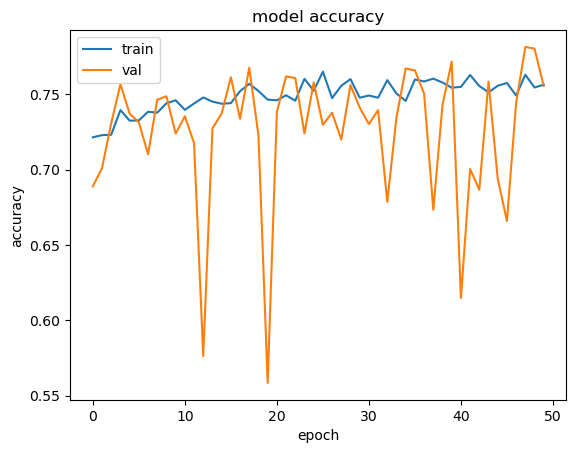

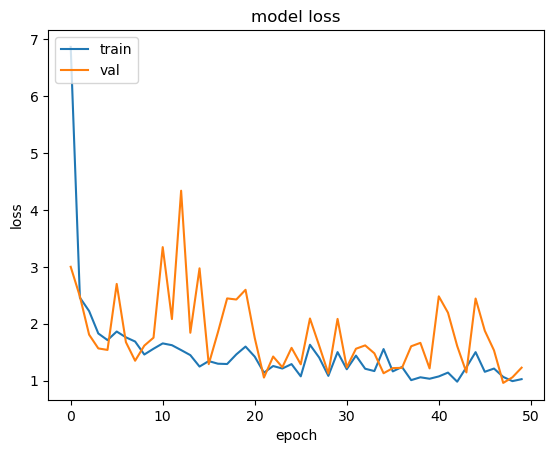

In [18]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(fitted_model.history['accuracy'])
plt.plot(fitted_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [19]:
# Get predictions (probabilities)
y_pred_prob = model.predict(X_test, verbose =2 )

score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

55/55 - 0s - 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.7522 - loss: 1.2279
The accuracy is:  0.7556066513061523


```
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
```

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get predictions (binary labels)
ann_pred_binary = (y_pred_prob[:, 0] > 0.5).astype(int)  # Convert probabilities to binary labels (threshold 0.5)

report = classification_report(y_test, ann_pred_binary)

# Convert to a DataFrame for pretty from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get predictions (binary labels)
ann_pred_binary = (y_pred_prob[:, 0] > 0.5).astype(int)  # Convert probabilities to binary labels (threshold 0.5)

# Get the classification report as a dictionary
report = classification_report(y_test, ann_pred_binary, output_dict=True)

# Convert the dictionary to a DataFrame for pretty display
df_report = pd.DataFrame(report).transpose()

# Apply styling to the DataFrame
styled_report = df_report.style.background_gradient(cmap='Blues').format(precision=2)

# Display the styled DataFrame
styled_report

# You can print it as well if needed
# print(df_report)
display
df_report = pd.DataFrame(report).transpose()
df_report.style.background_gradient(cmap='Blues').format(precision=2)

,precision,recall,f1-score,support
False,0.73,0.81,0.77,861.00
True,0.79,0.70,0.74,878.00
accuracy,0.76,0.76,0.76,0.76
macro avg,0.76,0.76,0.76,1739.00
weighted avg,0.76,0.76,0.75,1739.00


Confusion Matrix:


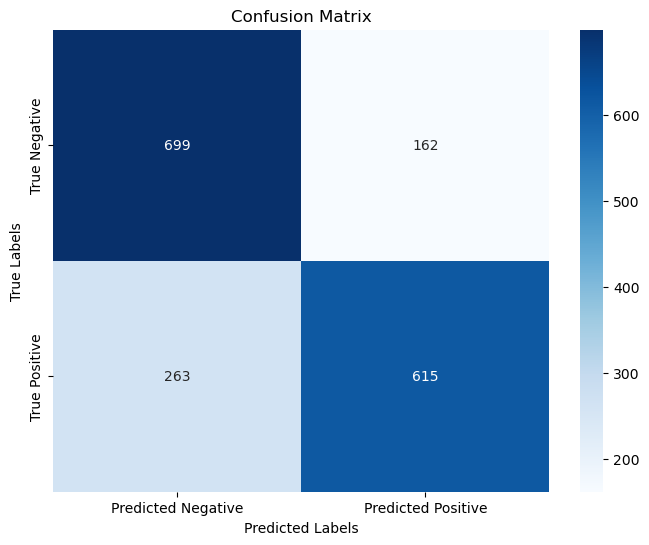

In [26]:
# Print the confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, ann_pred_binary)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["True Negative", "True Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()